<a href="https://colab.research.google.com/github/eshaanmathakari/shrimpInfectionDetection/blob/main/Shrimp_R3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train= ImageDataGenerator(rescale=1/255)

In [ ]:
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(r"/content/drive/Shareddrives/Major_Project/Image_dataset/train/",target_size=(200,200),batch_size =3, class_mode='binary')

Found 951 images belonging to 2 classes.


In [ ]:
validation_dataset = train.flow_from_directory(r"/content/drive/Shareddrives/Major_Project/Image_dataset/valid",target_size=(200,200),batch_size =3, class_mode='binary')

Found 231 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'healthy': 0, 'wssv': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation ='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                   ])

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
modelfit = model.fit(train_dataset,
                    steps_per_epoch=64,
                    epochs=35,
                    validation_data = validation_dataset)

Epoch 1/35
64/64 [==============================] - 68s 1s/step - loss: 1.0698 - accuracy: 0.5573 - val_loss: 0.6094 - val_accuracy: 0.7273
Epoch 2/35
64/64 [==============================] - 60s 939ms/step - loss: 0.6953 - accuracy: 0.6302 - val_loss: 0.5584 - val_accuracy: 0.6883
Epoch 3/35
64/64 [==============================] - 63s 992ms/step - loss: 0.5923 - accuracy: 0.6927 - val_loss: 0.5130 - val_accuracy: 0.7316
Epoch 4/35
64/64 [==============================] - 64s 1s/step - loss: 0.5392 - accuracy: 0.7865 - val_loss: 0.5616 - val_accuracy: 0.7532
Epoch 5/35
64/64 [==============================] - 64s 999ms/step - loss: 0.4422 - accuracy: 0.7917 - val_loss: 0.4696 - val_accuracy: 0.7706
Epoch 6/35
64/64 [==============================] - 65s 1s/step - loss: 0.3370 - accuracy: 0.8698 - val_loss: 0.3014 - val_accuracy: 0.8701
Epoch 7/35
64/64 [==============================] - 57s 883ms/step - loss: 0.2789 - accuracy: 0.8958 - val_loss: 0.2968 - val_accuracy: 0.8918
Epoch 8/

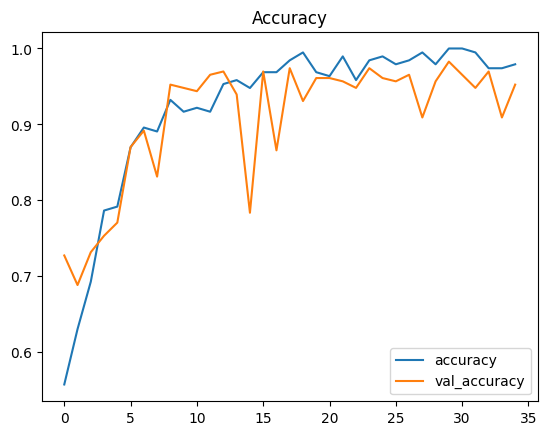

In [ ]:
pd.DataFrame(modelfit.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

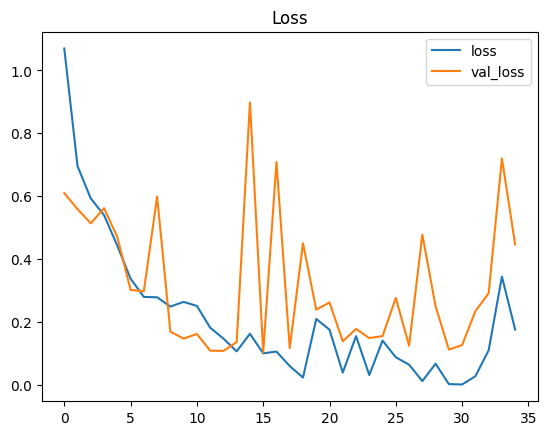

In [ ]:
pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [ ]:

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten,Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D,GlobalMaxPool2D
base_model1 = EfficientNetB0	(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)

for layer in base_model1.layers[:15]:
    layer.trainable = False
x = base_model1.output
x = GlobalMaxPool2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions1 = Dense(1, activation='sigmoid')(x)
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

In [ ]:
model1.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
modelfit = model1.fit(train_dataset,
                    steps_per_epoch=64,
                    epochs=35,
                    validation_data = validation_dataset)

Epoch 1/35
64/64 [==============================] - 89s 1s/step - loss: 4.6231 - accuracy: 0.6250 - val_loss: 0.7381 - val_accuracy: 0.4545
Epoch 2/35
64/64 [==============================] - 71s 1s/step - loss: 1.2990 - accuracy: 0.6875 - val_loss: 0.7488 - val_accuracy: 0.4632
Epoch 3/35
64/64 [==============================] - 91s 1s/step - loss: 1.0387 - accuracy: 0.6823 - val_loss: 0.6913 - val_accuracy: 0.5584
Epoch 4/35
64/64 [==============================] - 71s 1s/step - loss: 0.8867 - accuracy: 0.7292 - val_loss: 0.6425 - val_accuracy: 0.6926
Epoch 5/35
64/64 [==============================] - 69s 1s/step - loss: 0.8219 - accuracy: 0.7448 - val_loss: 1.5170 - val_accuracy: 0.6623
Epoch 6/35
64/64 [==============================] - 69s 1s/step - loss: 0.9086 - accuracy: 0.6615 - val_loss: 0.6770 - val_accuracy: 0.6277
Epoch 7/35
64/64 [==============================] - 69s 1s/step - loss: 0.7536 - accuracy: 0.7344 - val_loss: 1.4543 - val_accuracy: 0.5455
Epoch 8/35
64/64 [==

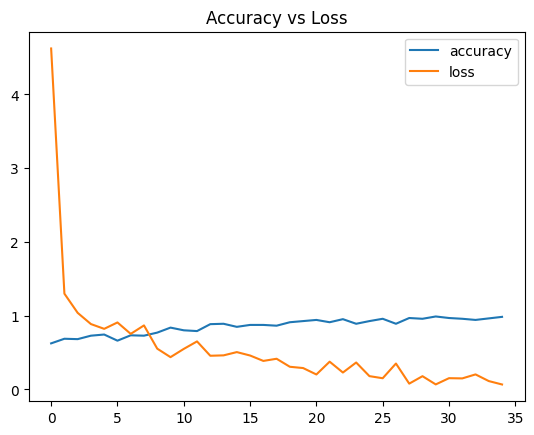

In [ ]:
pd.DataFrame(modelfit.history)[['accuracy','loss']].plot()
plt.title("Accuracy vs Loss")
plt.show()

In [ ]:
#as val_acccuracy and val_loss was very varying
#pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
#plt.title("Loss")
#plt.show()
